# Part I: Unsupervised Learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [208]:
df = pd.read_csv('credit_card.csv')

In [209]:
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1235,C11279,5.340221,0.454545,35.97,35.97,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2000.0,83.093843,97.069542,0.000000,12
8353,C18574,993.453968,1.000000,1114.26,1114.26,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,10,1500.0,582.043795,411.865777,0.000000,12
1577,C11630,5942.683036,1.000000,976.45,897.45,79.00,1963.562252,0.583333,0.583333,0.166667,0.166667,2,15,9000.0,1659.876332,1411.613705,0.000000,12
3126,C13216,44.081566,1.000000,503.25,0.00,503.25,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,8500.0,500.251341,171.601056,1.000000,12
2001,C12064,9355.739389,1.000000,0.00,0.00,0.00,2286.927789,0.000000,0.000000,0.000000,0.166667,4,0,10000.0,2335.887340,2531.968747,0.000000,12
5861,C16025,177.696201,1.000000,2799.53,929.67,1869.86,0.000000,1.000000,0.416667,1.000000,0.000000,0,59,3000.0,2687.141741,177.614322,0.166667,12
2409,C12482,0.000000,0.000000,313.89,0.00,313.89,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,6000.0,0.000000,NaN,0.000000,12
7187,C17382,1520.501423,1.000000,1405.22,828.40,576.82,0.000000,0.833333,0.416667,0.583333,0.000000,0,26,10500.0,470.831678,475.781780,0.000000,12
2497,C12571,1003.058842,1.000000,1627.00,1627.00,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,12,1200.0,1897.171179,613.912928,0.000000,12
8678,C18915,2486.283073,0.833333,0.00,0.00,0.00,4043.400571,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,394.549489,533.337236,0.000000,6


In [210]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## Q1. What does the primary analysis of several categorical features reveal?

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [212]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


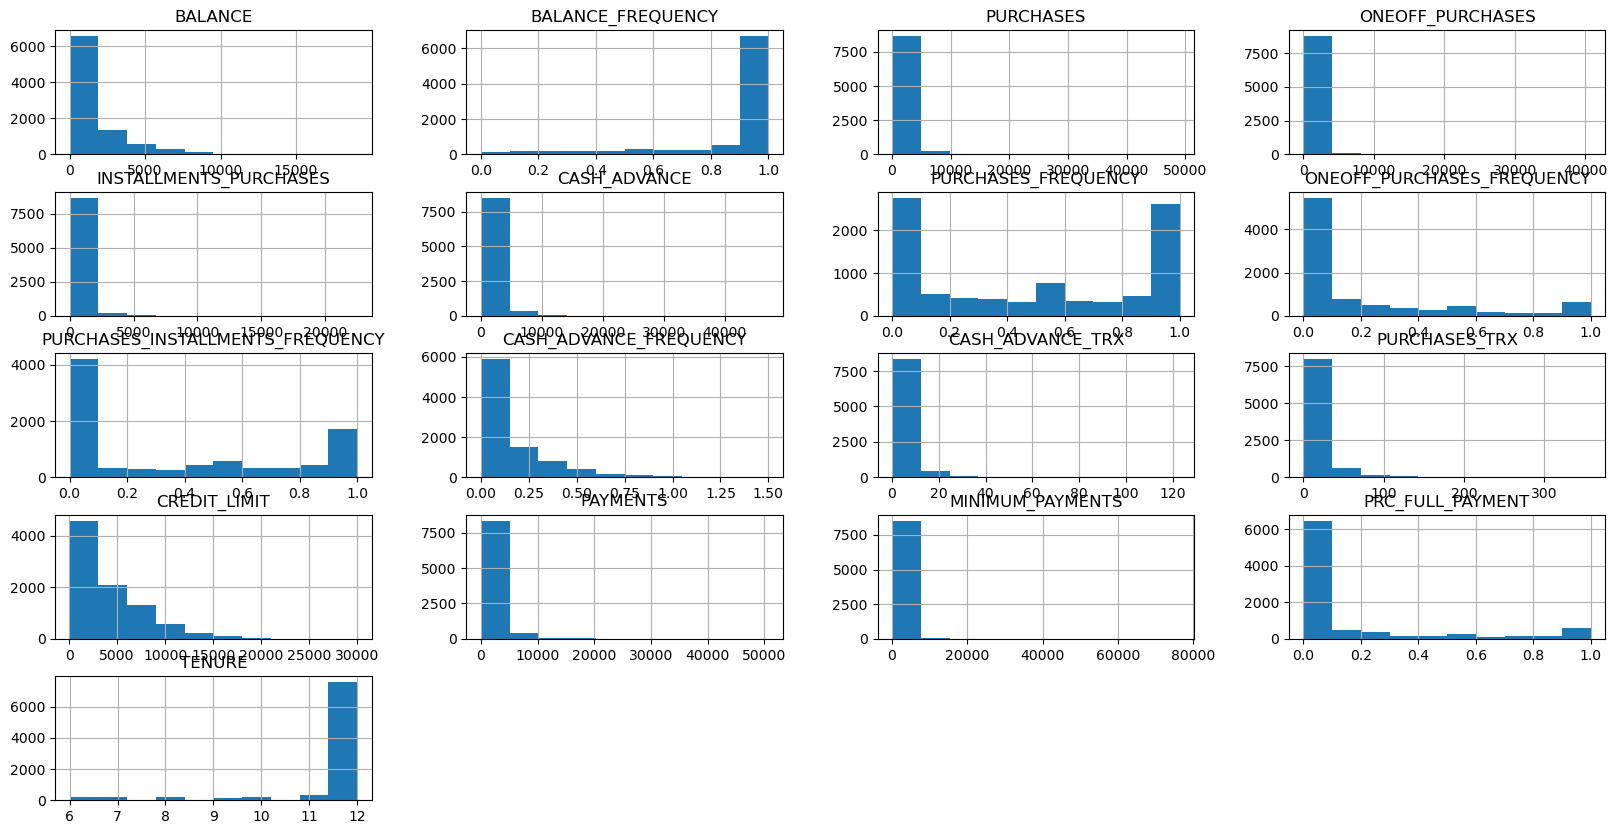

In [213]:
df.hist(figsize= [20,10])
plt.show()

In [214]:
df= df.drop(['CUST_ID'], axis=1)

## Primary analysis reveals that

### 1) There is no target variable specifically mentioned in the problem statement.Hence a unsupervised learning clustering problem

### 2) Based on counts, there may be missing values in Credit limit and minimum payments column because the value is less than 8950.

### 3) CUST_ID column can be deleted, since it doesnot add value iiiito the problem

### 4) Tenure of credit card usage by customers is between 6 to 12, but average being 11.5 years. hence there may be outliers present in the dataset. The similar fluctuations are there in other columns as well.

# Q2. Perform the following Exploratory Data Analysis tasks:
## a. Missing Value Analysis


In [215]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

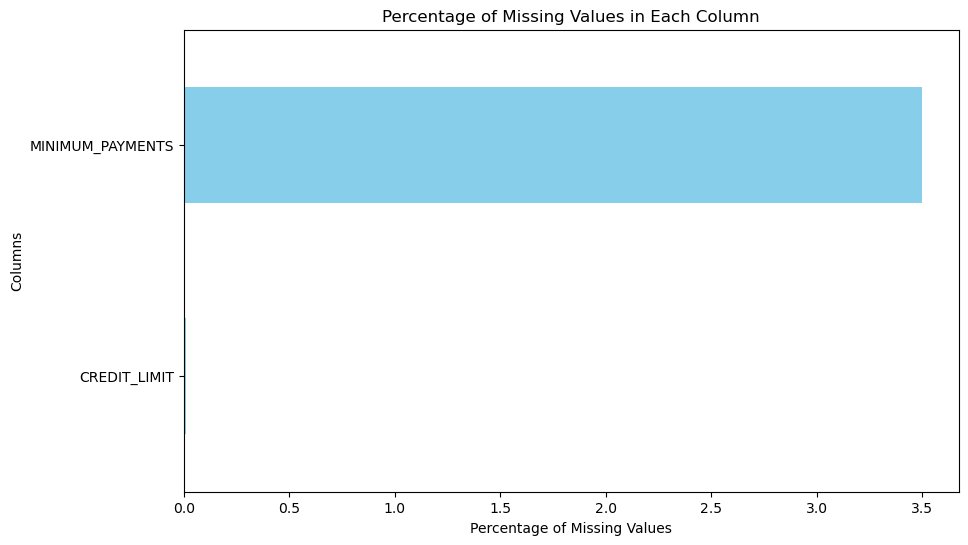

In [216]:
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

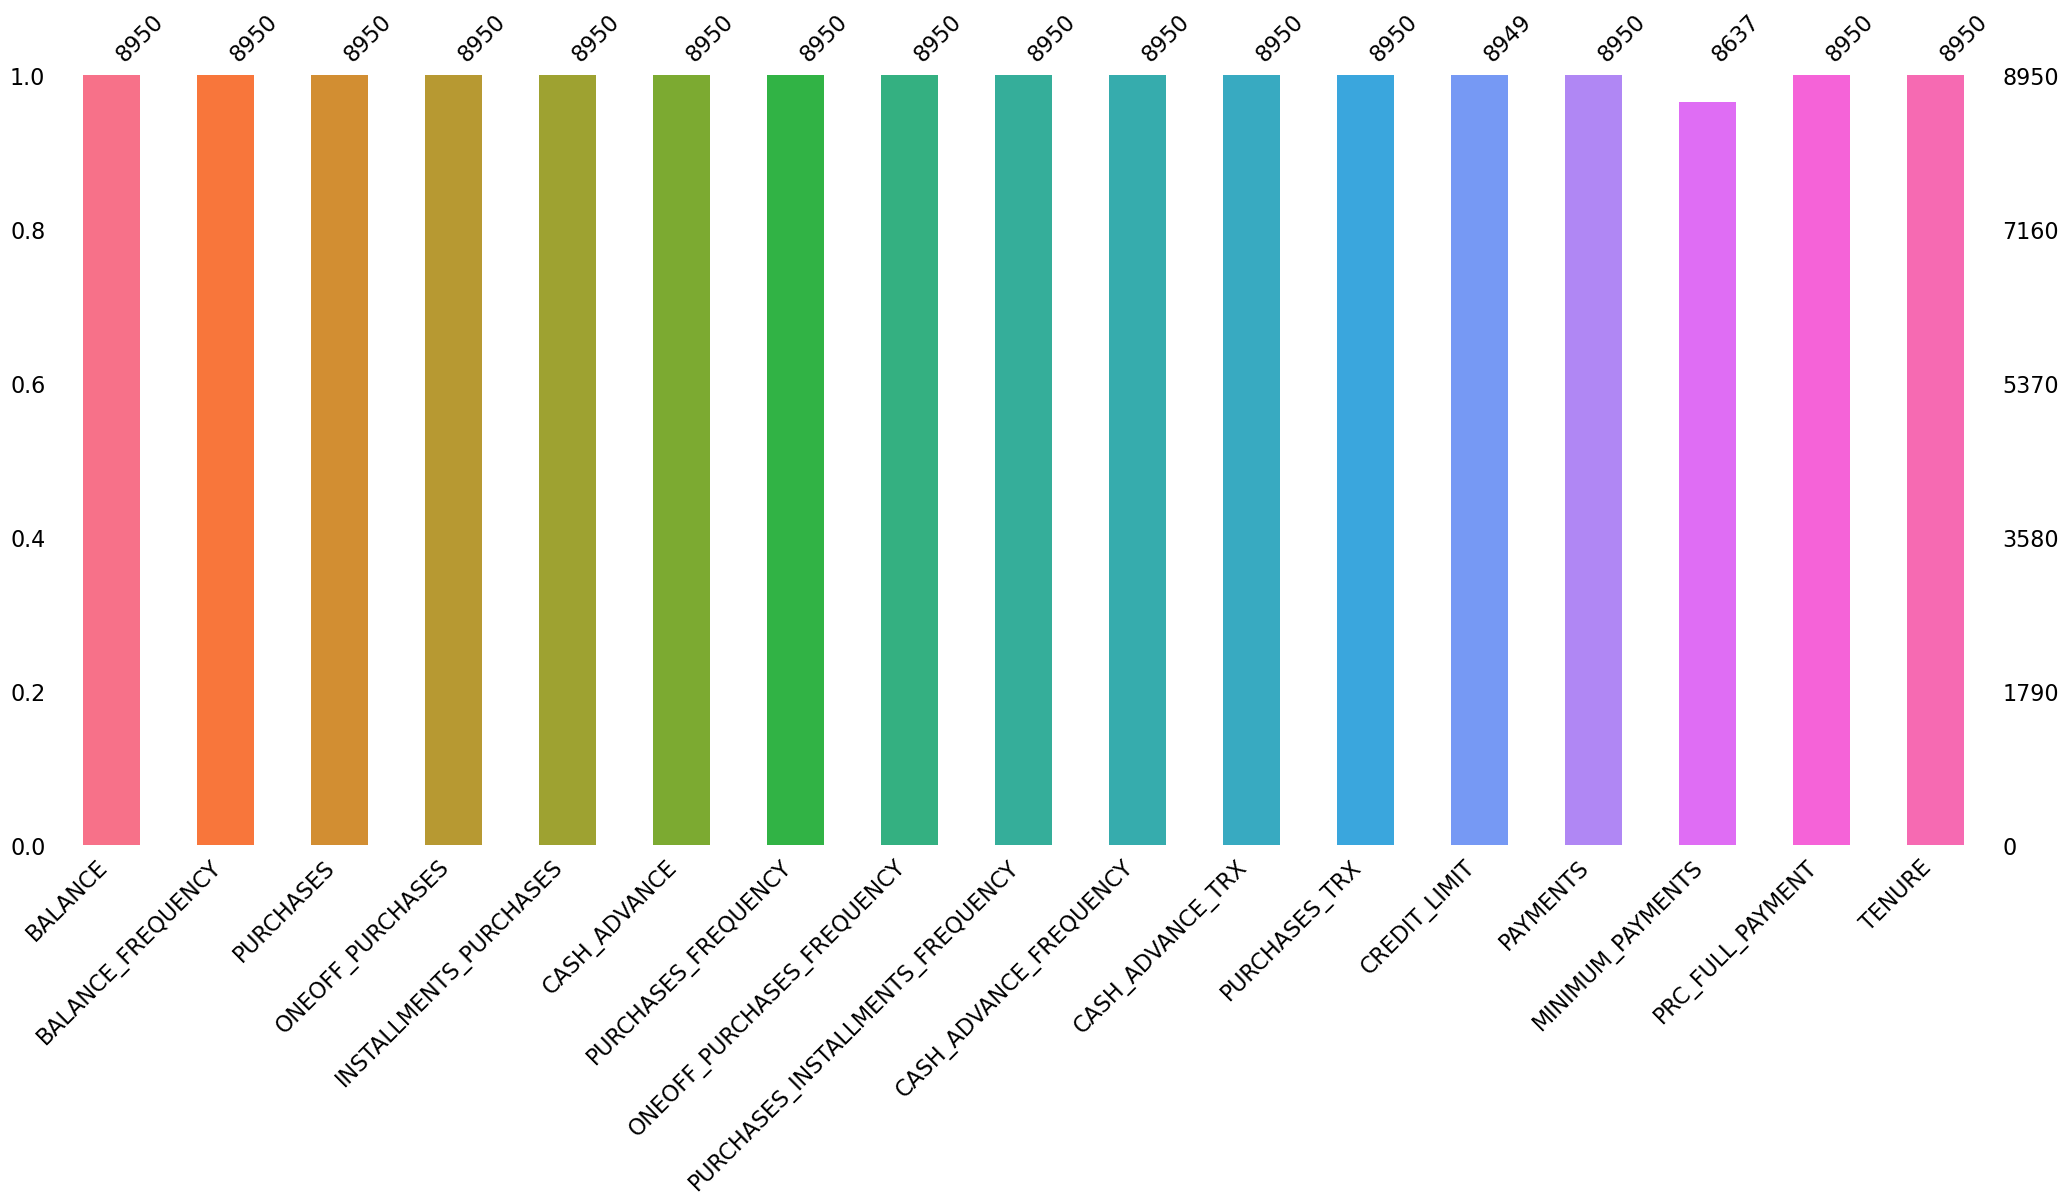

<Figure size 1200x800 with 0 Axes>

In [217]:
import missingno as msno

color_palette = sns.color_palette("husl", len(df.columns))

msno.bar(df, color=color_palette)


plt.figure(figsize=(12, 8))
plt.tight_layout()


plt.show()


## FROM THE ABOVE WE CAN INFER THAT 'MINIMUM_PAYMENTS' HAS 313 MISSING VALUES AND 'CREDIT_LIMIT' HAS ONLY ONE MISSING VALUE

### Now we handle those missing values through the following steps

In [218]:
df['MINIMUM_PAYMENTS'].dtypes

dtype('float64')

### Since the column 'MINIMUM_PAYMENTS' is in float64 datatype we replace the missing values with median.

In [219]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].replace(np.NaN,df.MINIMUM_PAYMENTS.median())

In [220]:
df['CREDIT_LIMIT'].dtypes

dtype('float64')

### Since the column 'CREDIT_LIMIT' is in float64 datatype we replace the missing values with median.

In [221]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].replace(np.NaN,df.CREDIT_LIMIT.median())

In [222]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Now from the above we can clearly see that all missing vakues have been handled.

# -----------------------------------------------------------------------------------------

## b. Outlier Treatment using the Z-score method c. Deal with correlated variables

## Thus from the above we can see there are a lot of outliers

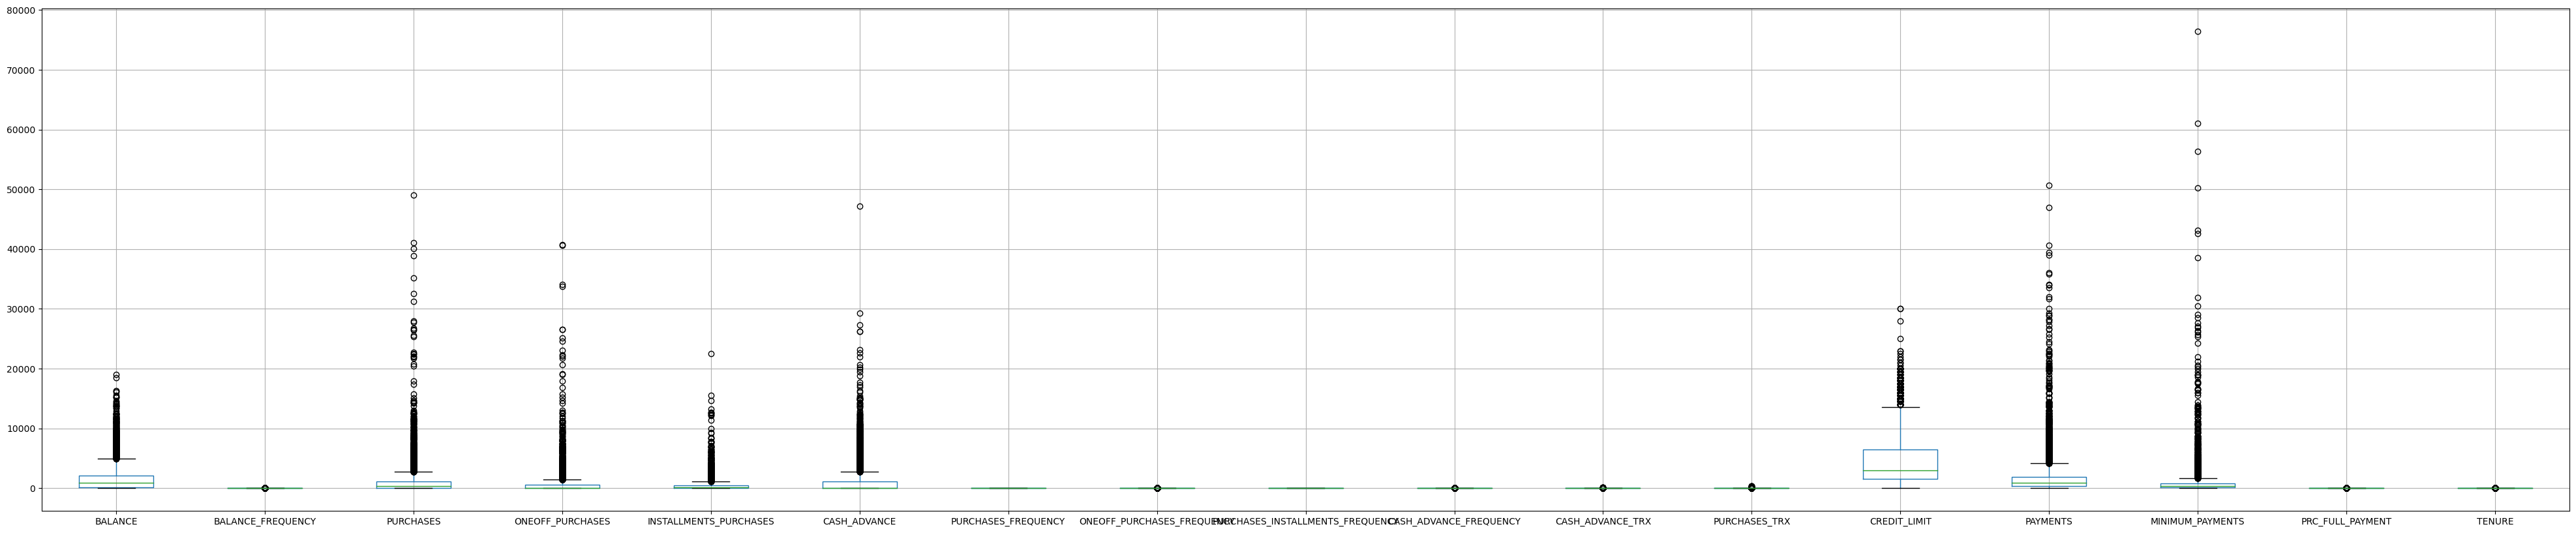

In [223]:
df.boxplot(figsize= [50,10])

plt.show()

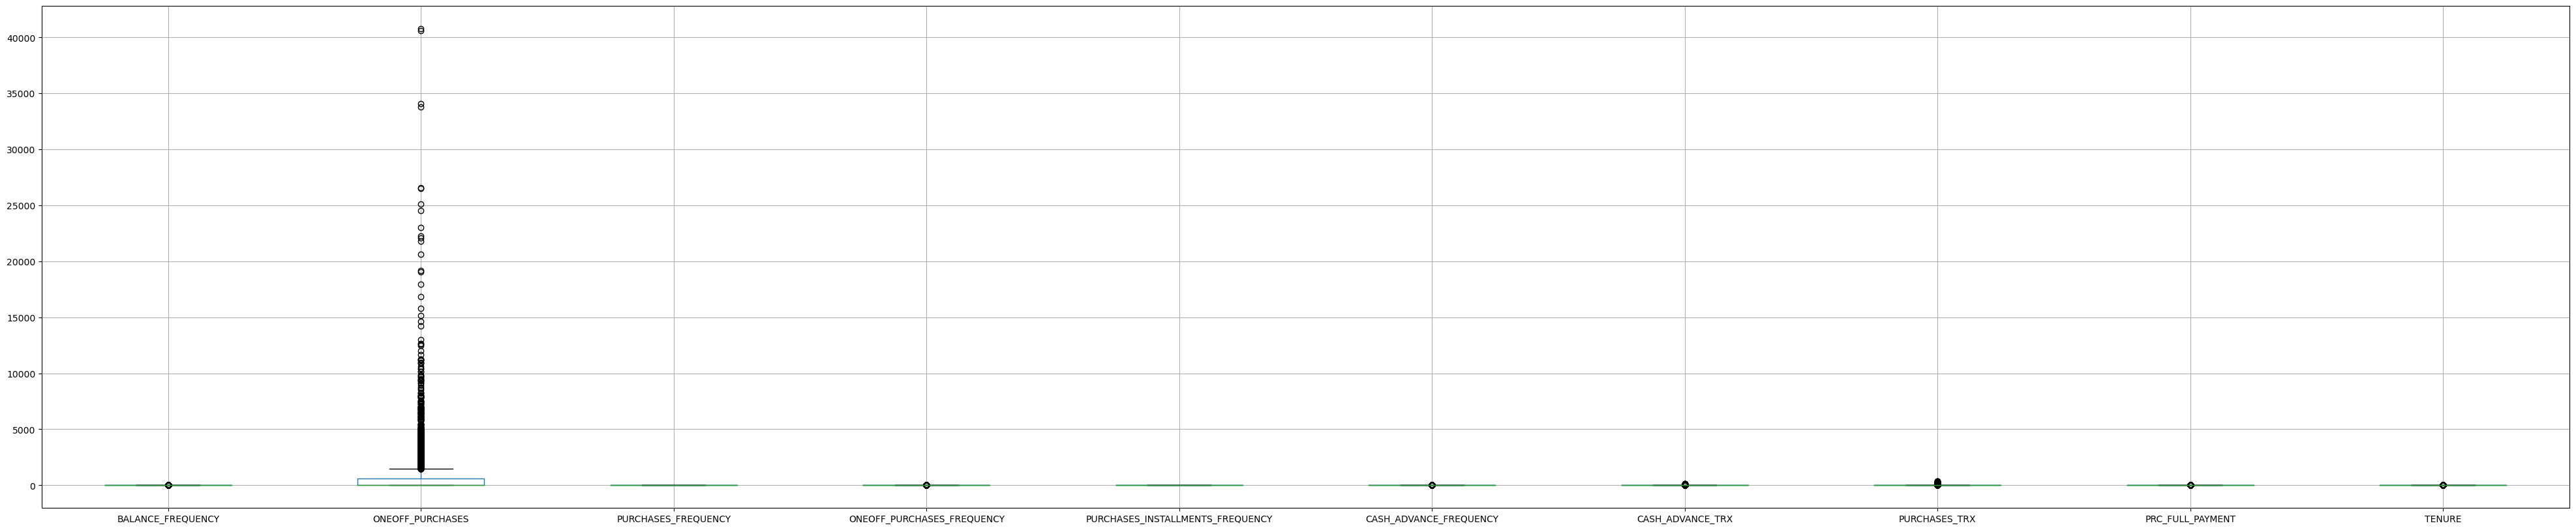

In [224]:
df.drop(['BALANCE','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'], axis=1).boxplot(figsize= [50,10])

plt.show()

In [225]:
from scipy.stats import zscore 
df['zscore1'] = ( df.CASH_ADVANCE - df.CASH_ADVANCE.mean() ) / df.CASH_ADVANCE.std()
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759


In [226]:
df[df['zscore1']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3.335717
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11,3.764372
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,3.600948
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,12.549146
128,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.000000,12,3.520604
133,9354.060450,1.000000,796.33,796.33,0.00,13748.471310,0.083333,0.083333,0.000000,0.666667,16,1,13000.0,10664.658660,2600.875721,0.083333,12,6.088985
182,2881.253586,1.000000,117.00,0.00,117.00,17661.494860,0.250000,0.000000,0.166667,0.750000,28,3,4500.0,17301.832380,931.618475,0.166667,12,7.954850
240,3215.511032,0.818182,1112.20,1112.20,0.00,7616.064965,0.250000,0.250000,0.000000,0.250000,4,4,7200.0,0.000000,312.343947,0.000000,12,3.164843
248,9612.215120,1.000000,319.92,0.00,319.92,13439.570400,1.000000,0.000000,1.000000,0.416667,12,12,12000.0,10993.892110,2501.560923,0.000000,12,5.941691
263,7755.698607,1.000000,8533.54,4072.76,4460.78,7540.307350,1.000000,0.500000,0.833333,0.500000,12,72,10000.0,4758.209146,7256.951816,0.000000,6,3.128719


In [227]:
df[df['zscore1']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1


In [228]:
df_new = df[(df.zscore1>-3) & (df.zscore1<3)]

In [229]:
from scipy.stats import zscore 
df_new['zscore2'] = (df_new.PURCHASES - df_new.PURCHASES.mean() ) / df_new.PURCHASES.std()
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


In [230]:
df_new[df_new['zscore2']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,-0.466759,5.380597
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,-0.466759,9.863385
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12,0.698836,4.126864
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12,0.306039,4.328347
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12,-0.466759,4.622810
220,9047.621884,1.000000,11188.62,6099.16,5089.46,0.000000,1.000000,0.750000,1.000000,0.000000,0,151,10000.0,11994.418150,8517.258683,0.000000,12,-0.466759,4.782505
224,6571.484039,1.000000,9325.22,9325.22,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,8500.0,11036.726680,1824.680131,0.000000,12,-0.466759,3.907591
229,2723.369217,0.909091,10410.49,1158.84,9251.65,0.000000,0.750000,0.666667,0.583333,0.000000,0,41,19500.0,9695.650901,726.696049,0.363636,12,-0.466759,4.417153
273,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.344320,1971.129435,0.083333,12,-0.466759,14.807426
393,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,11000.0,7932.774020,17494.907350,0.000000,12,0.834320,4.763119


In [231]:
df_new[df_new['zscore2']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2


In [232]:
df_new = df_new[(df_new.zscore2>-3) & (df_new.zscore2<3)]

In [233]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


In [234]:
df_new.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
zscore1                             float64
zscore2                             float64
dtype: object

# -----------------------------------------------------------------------------------------

## c. Deal with correlated variables

In [235]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

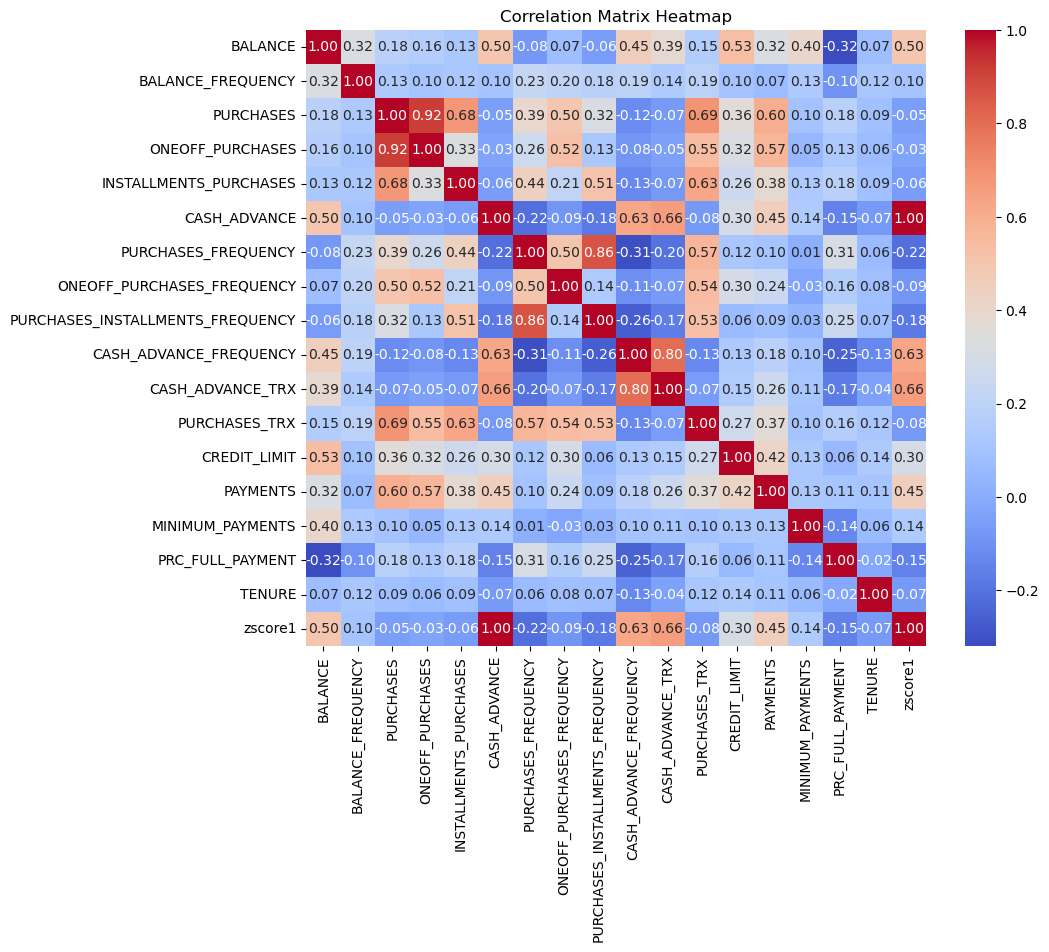

In [236]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [237]:
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.add((colname_i, colname_j))

for var1, var2 in highly_correlated:
    if abs(correlation_matrix.loc[var1, :].sum()) > abs(correlation_matrix.loc[var2, :].sum()):
        df.drop(var2, axis=1, inplace=True)
    else:
        df.drop(var1, axis=1, inplace=True)

# -----------------------------------------------------------------------------------------

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [248]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [249]:
df_numeric = df_new.select_dtypes(include=[np.number])

In [250]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [251]:
pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(scaled_data)

In [252]:
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

In [239]:
print(pca_df)

            PC1           PC2       PC3        PC4        PC5        PC6  \
0     -1.481745 -1.856667e+00 -0.345776   0.536468  -0.114633  -0.160243   
1     -2.954790  4.359819e+00 -0.105643  -1.080489   1.969230  -0.487227   
2      1.204198 -1.726627e-01 -1.395693   1.401496  -1.065309  -0.747175   
3     -0.183051 -3.136418e-01 -2.018597   0.771560   0.365241   0.410987   
4     -1.538380 -1.477427e+00 -0.479189   0.971565  -0.388159  -0.412265   
5      0.938402 -7.622988e-01  1.480374   1.004794   0.235349   0.528536   
6     10.188497  2.537459e+00 -4.387034  -1.336511   0.301278   0.004798   
7      0.511369 -1.283646e+00  1.910571   0.634453  -0.244913  -0.404220   
8     -0.033937 -7.730357e-01 -0.556134   1.055965   0.087928  -0.325592   
9      0.106824 -6.746052e-01 -2.356015   0.566995   1.169833   0.292283   
10     1.056098 -1.162074e+00  2.209191   0.715504  -0.093582   0.175074   
11     0.260518 -9.906366e-01 -1.794561   0.623763  -0.606990   0.080858   
12     3.846

## The code reduces the number of dimensions while preserving a significant portion of the variance in the original data. This can be useful for simplifying the dataset, improving computational efficiency, and potentially enhancing the performance of machine learning models that may struggle with high-dimensional data.

## Here a new dataframe has been created with the PCS results named as 'pca_df'

# -----------------------------------------------------------------------------------------

## Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [240]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pca_df_numeric = pca_df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df_numeric)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

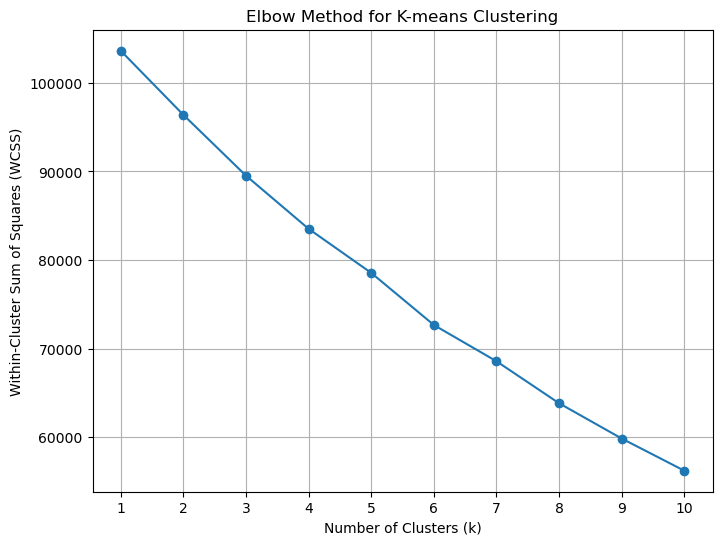

In [241]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# -----------------------------------------------------------------------------------------

## Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [243]:
missing_values = pca_df.isnull().sum().sum()
if missing_values > 0:
    imputer = Imputer(strategy='mean')
    pca_df = pd.DataFrame(imputer.fit_transform(pca_df), columns=pca_df.columns)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

k_values = range(2, 11)
silhouette_scores = []

In [244]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_k = k_values[np.argmax(silhouette_scores)]

In [245]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_cluster_labels = final_kmeans.fit_predict(scaled_data)

In [246]:
cluster_counts = pd.Series(final_cluster_labels).value_counts().sort_index()

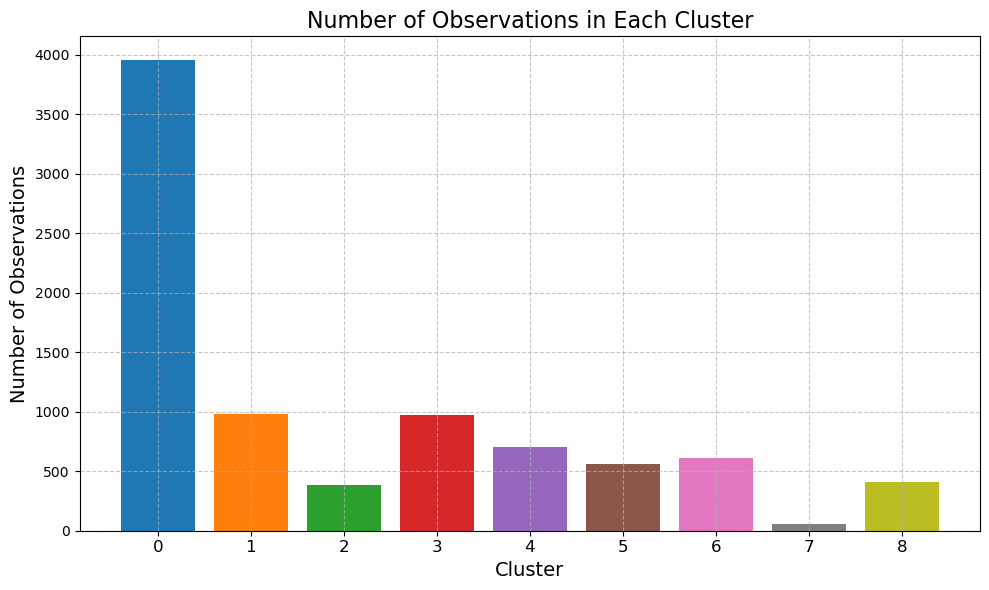

In [247]:
cluster_counts = pd.Series(final_cluster_labels).value_counts().sort_index()
colors = plt.cm.tab10.colors

plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color=colors)
plt.xlabel('Cluster', fontsize=14) 
plt.ylabel('Number of Observations', fontsize=14)  
plt.title('Number of Observations in Each Cluster', fontsize=16)
plt.xticks(range(best_k), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

## The codes performs K-means clustering on a dataset that has undergone PCA for dimensionality reduction. It finds the optimal number of clusters ('best_k') using the silhouette score method and then clusters the data accordingly. The number of observations in each cluster is visualized using a bar plot for easy interpretation and presentation.

# -----------------------------------------------------------------------------------------

# Part II: Deep Learning

In [30]:
df1 = pd.read_csv('Sentiment.csv')

In [4]:
df1.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

## Q1. Print the total number of positive and negative sentiments.

In [8]:
df1['sentiment'].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [9]:
sentiment_counts = df1['sentiment'].value_counts()

# Print the result
print("Total number of positive sentiments:", sentiment_counts['Positive'])
print("Total number of negative sentiments:", sentiment_counts['Negative'])
print("Total number of negative sentiments:", sentiment_counts['Neutral'])

Total number of positive sentiments: 2236
Total number of negative sentiments: 8493
Total number of negative sentiments: 3142


# -----------------------------------------------------------------------------------------

## Q2. Build a sequential LSTM model to predict positive and negative sentiments.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
import wordninja

In [11]:
print("Original DataFrame shape:", df1.shape)

def preprocess_text(sentence):
    words = wordninja.split(sentence) 
    return ' '.join(words)

df1['text'] = df1['text'].apply(preprocess_text)


Original DataFrame shape: (13871, 21)


In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['text'])
sequences = tokenizer.texts_to_sequences(df1['text'])
max_sequence_length = max(len(sequence) for sequence in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = df1['sentiment'].map({'Positive': 0, 'Negative': 1, 'Neutral': 2}).values
y = to_categorical(y, num_classes=3)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
lstm_units = 128

In [15]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))  # Adding dropout regularization
model.add(Dense(units=64, activation='relu'))  # Adding an additional dense layer
model.add(Dense(units=3, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
174/174 [==============================] - 13s 73ms/step - loss: 0.8360 - accuracy: 0.6351
Epoch 2/20
174/174 [==============================] - 14s 80ms/step - loss: 0.6409 - accuracy: 0.7341
Epoch 3/20
174/174 [==============================] - 14s 79ms/step - loss: 0.4889 - accuracy: 0.8125
Epoch 4/20
174/174 [==============================] - 13s 77ms/step - loss: 0.3798 - accuracy: 0.8580
Epoch 5/20
174/174 [==============================] - 14s 78ms/step - loss: 0.2996 - accuracy: 0.8855
Epoch 6/20
174/174 [==============================] - 14s 78ms/step - loss: 0.2501 - accuracy: 0.9031
Epoch 7/20
174/174 [==============================] - 13s 78ms/step - loss: 0.2182 - accuracy: 0.9148
Epoch 8/20
174/174 [==============================] - 14s 79ms/step - loss: 0.1945 - accuracy: 0.9223
Epoch 9/20
174/174 [==============================] - 13s 76ms/step - loss: 0.1921 - accuracy: 0.9231
Epoch 10/20
174/174 [==============================] - 14s 78ms/step - loss: 0.176

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

87/87 [==============================] - 1s 8ms/step - loss: 2.3393 - accuracy: 0.6548
Test accuracy: 0.6547747850418091


# -----------------------------------------------------------------------------------------

## Q3. Based on the model, check the sentiment for the following two sentences
### a. 'He is a great leader.'
### b. 'He is a terrible leader.'

In [28]:
new_sentences = ['He is a great leader.', 'He is a terrible leader.']
# Preprocess the new sentences and convert to sequences
new_sequences = tokenizer.texts_to_sequences([preprocess_text(sentence) for sentence in new_sentences])
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
# Make predictions using the model
predictions = model.predict(new_padded_sequences)
# Convert predictions to sentiment labels
sentiment_labels = ['Positive', 'Negative', 'Neutral']
predicted_sentiments = [sentiment_labels[prediction.argmax()] for prediction in predictions]
# Print the results
for sentence, sentiment in zip(new_sentences, predicted_sentiments):
    print(f"Sentence: {sentence} --> Sentiment: {sentiment}")

1/1 [==============================] - 0s 21ms/step
Sentence: He is a great leader. --> Sentiment: Positive
Sentence: He is a terrible leader. --> Sentiment: Neutral


In [35]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Load the data
data = pd.read_csv('sentiment.csv', usecols=['text', 'sentiment'])

# Drop rows with missing values
data.dropna(subset=['text', 'sentiment'], inplace=True)

# Filter positive and negative sentiments
data = data[data['sentiment'].isin(['Positive', 'Negative'])]

# Convert sentiments to binary labels (0 for negative, 1 for positive)
data['sentiment'] = data['sentiment'].map({'Negative': 0, 'Positive': 1})

In [33]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad sequences to have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Prepare the target labels
labels = to_categorical(data['sentiment'])

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(sequences, labels, epochs=5, batch_size=64)

# Function to predict sentiment for a given sentence
def predict_sentiment(sentence):
    sequence = tokenizer.texts_to_sequences([sentence])
    sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(sequence)[0]
    if prediction[0] > prediction[1]:
        return 'negative'
    else:
        return 'positive'

# Sentences to predict sentiment for
sentence_a = 'He is a great leader.'
sentence_b = 'He is a terrible leader.'

# Predict sentiments for the given sentences
sentiment_a = predict_sentiment(sentence_a)
sentiment_b = predict_sentiment(sentence_b)

print("Sentiment for sentence a:", sentiment_a)
print("Sentiment for sentence b:", sentiment_b)

ValueError: max() arg is an empty sequence

# -----------------------------------------------------------------------------------------

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad sequences to have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Prepare the target labels
labels = to_categorical(data['sentiment'])

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(sequences, labels, epochs=5, batch_size=64)

# Function to predict sentiment for a given sentence
def predict_sentiment(sentence):
    sequence = tokenizer.texts_to_sequences([sentence])
    sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(sequence)[0]
    if prediction[0] > prediction[1]:
        return 'negative'
    else:
        return 'positive'

# Sentences to predict sentiment for
sentence_a = 'He is a great leader.'
sentence_b = 'He is a terrible leader.'

# Predict sentiments for the given sentences
sentiment_a = predict_sentiment(sentence_a)
sentiment_b = predict_sentiment(sentence_b)

print("Sentiment for sentence a:", sentiment_a)
print("Sentiment for sentence b:", sentiment_b)